In [31]:
from pandas_datareader import wb
import pandas_datareader.data as web
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)
from pandas_datareader import data as pdr

import altair as alt

%matplotlib inline

[*********************100%***********************]  1 of 1 completed


<AxesSubplot: xlabel='Date'>

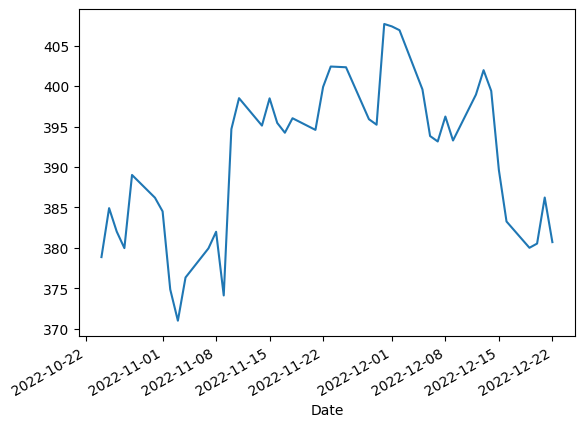

In [4]:
data = web.DataReader('SPY', start='2022-10-24', end='2022-12-23') 
c = data['Close']
c.plot()

In [7]:
# Read Data
test = web.DataReader(['TSLA','FB'], start='2018-01-01', end='2019-12-31')
test.head()

[*********************100%***********************]  2 of 2 completed

1 Failed download:
- FB: No timezone found, symbol may be delisted


Adj Close            Close            High            Low  \
                           FB       TSLA    FB       TSLA   FB       TSLA  FB   
Date                                                                            
2018-01-02 00:00:00       NaN  21.368668   NaN  21.368668  NaN  21.474001 NaN   
2018-01-03 00:00:00       NaN  21.150000   NaN  21.150000  NaN  21.683332 NaN   
2018-01-04 00:00:00       NaN  20.974667   NaN  20.974667  NaN  21.236668 NaN   
2018-01-05 00:00:00       NaN  21.105333   NaN  21.105333  NaN  21.149332 NaN   
2018-01-08 00:00:00       NaN  22.427334   NaN  22.427334  NaN  22.468000 NaN   

                               Open            Volume             
                          TSLA   FB       TSLA     FB       TSLA  
Date                                                              
2018-01-02 00:00:00  20.733334  NaN  20.799999    NaN   65283000  
2018-01-03 00:00:00  21.036667  NaN  21.400000    NaN   67822500  
2018-01-04 00:00:00  20.378668  NaN  20.858000    NaN  149194500  
2018-01-05 00:00:00  20.799999  NaN  21.108000    NaN   68868000  
2018-01-08 00:00:00  21.033333  NaN  21.066668    NaN  147891000

In [23]:
start = datetime(2018, 9, 1)
end = datetime(2018, 9, 10)
start
google = web.DataReader('GOOG', start=start, end=end).reset_index()
google

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-04,60.213501,60.649502,59.625000,59.849998,59.849998,36620000
1,2018-09-05,59.689999,59.950500,58.099998,59.324001,59.324001,41226000
2,2018-09-06,59.314999,59.314999,57.599998,58.571999,58.571999,37770000
3,2018-09-07,57.933498,58.763000,57.860748,58.241501,58.241501,28026000


In [24]:
df = web.DataReader("TSLA",start,end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-04,19.796000,19.879333,19.200001,19.263332,19.263332,125257500
2018-09-05,19.003332,19.118668,18.478666,18.716000,18.716000,115812000
2018-09-06,18.986668,19.411333,18.591999,18.730000,18.730000,112212000
2018-09-07,17.340000,17.889999,16.816668,17.549334,17.549334,337378500


In [27]:
# read in stock price data for tesla for the last 5 years
start = datetime(2015,10,11)
end = datetime(2020,10,11)
df = web.DataReader("TSLA",start,end)
# display header of stock price data frame
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-10-12,14.866000,14.866667,14.351333,14.372000,14.372000,57544500
2015-10-13,14.218667,14.834667,14.075333,14.616667,14.616667,77572500
2015-10-14,14.711333,14.730000,14.362000,14.458667,14.458667,46566000
2015-10-15,14.428667,14.782000,14.246667,14.754000,14.754000,42663000
2015-10-16,14.869333,15.365333,14.858000,15.134000,15.134000,65017500


In [28]:
df["Dates"] = df.index

In [32]:
# create chart with altair
chart = alt.Chart(df).mark_area().encode(
    x="Dates",
    y="Close"
)
# display altair chart
chart

/usr/local/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [33]:
# create altair chart
chart = alt.Chart(df).mark_area(line={'color':'darkgreen'},color=alt.Gradient(
        gradient='linear',
        stops=[alt.GradientStop(color='white', offset=0),
               alt.GradientStop(color='darkgreen', offset=1)])).encode(x="Dates",y="Close")
# display altair chart
chart

alt.Chart(...)

In [34]:
# add chart title
chart.title = "Daily TSLA stock closing prices [USD]"
# adjust x and y axis labels
chart.encoding.x.title = "Time"
chart.encoding.y.title = "Daily closing price [USD]"
# display modified chart
chart

alt.Chart(...)

In [35]:
# create color conditions
color_conditions = alt.condition("datum.Open <= datum.Close",
                                 alt.value("green"),
                                 alt.value("red"))# build chart
chart = alt.Chart(df).encode(x = "Dates")
# set title of chart
chart.title = "Candle-stick diagram of TSLA stock prices"
# set x axis label for chart
chart.encoding.x.title = "Time"
# construct a rule mark using mark_rule() method
rules = chart.mark_rule().encode(
    y = "Low",
    y2 = "High")
# adjust y axis label for rules
rules.encoding.y.title = "Price"
# construct bars
bars = chart.mark_bar().encode(
    y="Open",
    y2="Close",
    color = color_conditions)
# display rules and bars (both based on the same basic chart
rules + bars

alt.LayerChart(...)

In [36]:
# create line plot
chart = alt.Chart(df).mark_line().encode(x="Dates",y="Close")
# set title and axis lables
chart.title = "Daily TSLA stock closing prices"
chart.encoding.x.title = "Time"
chart.encoding.y.title = "Price [USD]"
# display line plot
chart

alt.Chart(...)

In [37]:
# create color conditions
color_conditions = alt.condition("datum.Open <= datum.Close",
                                 alt.value("green"),
                                 alt.value("red"))# build chart
chart = alt.Chart(df).encode(x = "Dates").properties(width=800)
# set title of chart
chart.title = "Candle-stick diagram of TSLA stock prices"
# set x axis label for chart
chart.encoding.x.title = "Time"
# construct a rule mark using mark_rule() method
rules = chart.mark_rule().encode(
    y = "Low",
    y2 = "High")
# adjust y axis label for rules
rules.encoding.y.title = "Price"
# construct bars
bars = chart.mark_bar().encode(
    y="Open",
    y2="Close",
    color = color_conditions)
# display rules and bars (both based on the same basic chart
rules + bars

alt.LayerChart(...)